<a href="https://colab.research.google.com/github/ertecino/dunya_mutluluk_raporu/blob/main/dunya_mutluluk_raporu_projesi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("unsdsn/world-happiness")

print("Path to dataset files:", path)

100%|██████████| 36.8k/36.8k [00:00<00:00, 17.5MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/unsdsn/world-happiness/versions/2


In [2]:
import os
import pandas as pd

# path değişkeni yukarıdaki çıktıdan geliyor:
path = "/root/.cache/kagglehub/datasets/unsdsn/world-happiness/versions/2"

print("\nİndirilen klasördeki dosyalar:")
for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith(".csv"):
            print(os.path.join(root, file))


İndirilen klasördeki dosyalar:
/root/.cache/kagglehub/datasets/unsdsn/world-happiness/versions/2/2019.csv
/root/.cache/kagglehub/datasets/unsdsn/world-happiness/versions/2/2015.csv
/root/.cache/kagglehub/datasets/unsdsn/world-happiness/versions/2/2018.csv
/root/.cache/kagglehub/datasets/unsdsn/world-happiness/versions/2/2017.csv
/root/.cache/kagglehub/datasets/unsdsn/world-happiness/versions/2/2016.csv


In [3]:
path = "/root/.cache/kagglehub/datasets/unsdsn/world-happiness/versions/2"

# CSV dosyalarının tam yollarını listeleyelim
csv_files = [os.path.join(path, f) for f in os.listdir(path) if f.endswith('.csv')]

# Verileri depolayacağımız boş bir liste
all_data = []

# Her bir CSV dosyasını okuyup DataFrame'e dönüştür ve yıla sütun ekle
for f in csv_files:
    df = pd.read_csv(f)
    # Dosya adından yılı al (örn: "2019.csv" -> 2019)
    year = int(os.path.basename(f).replace('.csv', ''))
    df['Year'] = year # 'Year' adında yeni bir sütun ekle
    all_data.append(df)

# Tüm DataFrame'leri tek bir DataFrame'de birleştir
df_combined = pd.concat(all_data, ignore_index=True)

print("Birleştirilmiş DataFrame'in ilk 5 satırı:")
print(df_combined.head())

print("\nBirleştirilmiş DataFrame'in bilgi özeti:")
df_combined.info()

print("\nBirleştirilmiş DataFrame'deki eksik değerlerin toplamı:")
print(df_combined.isnull().sum())

print("\nBirleştirilmiş DataFrame'deki benzersiz yıllar:")
print(df_combined['Year'].unique())

Birleştirilmiş DataFrame'in ilk 5 satırı:
   Overall rank Country or region  Score  GDP per capita  Social support  \
0           1.0           Finland  7.769           1.340           1.587   
1           2.0           Denmark  7.600           1.383           1.573   
2           3.0            Norway  7.554           1.488           1.582   
3           4.0           Iceland  7.494           1.380           1.624   
4           5.0       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  Year  ... Happiness.Rank Happiness.Sco

In [4]:
import pandas as pd
import os

# df_combined DataFrame'iniz zaten oluşmuş olmalı. Eğer runtime kesildiyse,
# önceki kod bloğunu (veri okuma ve birleştirme) tekrar çalıştırmanız gerekebilir.

# Sütun adlarını inceleyelim ve standartlaştırma için bir eşleme (mapping) oluşturalım
# Hangi sütunların aslında aynı bilgiyi temsil ettiğini manuel olarak belirliyoruz.
# Bu genellikle veri setlerinin dokümantasyonuna bakarak veya veriyi elle inceleyerek yapılır.

column_mapping = {
    # Ülke sütunları
    'Country or region': 'Country',
    'Country': 'Country', # Kendisiyle eşleşsin

    # Mutluluk Puanı sütunları
    'Score': 'Happiness Score',
    'Happiness Score': 'Happiness Score',
    'Happiness.Score': 'Happiness Score', # 2015 yılı için olabilir

    # Sıralama sütunları
    'Overall rank': 'Happiness Rank',
    'Happiness Rank': 'Happiness Rank',
    'Happiness.Rank': 'Happiness Rank', # 2015 yılı için olabilir

    # Ana faktör sütunları
    'GDP per capita': 'GDP per Capita',
    'Economy (GDP per Capita)': 'GDP per Capita',
    'Economy..GDP.per.Capita.': 'GDP per Capita', # 2015 yılı için olabilir

    'Social support': 'Social Support',
    'Family': 'Social Support', # Family ve Social support genellikle benzer kavramlardır

    'Healthy life expectancy': 'Health (Life Expectancy)',
    'Health (Life Expectancy)': 'Health (Life Expectancy)',
    'Health..Life.Expectancy.': 'Health (Life Expectancy)', # 2015 yılı için olabilir

    'Freedom to make life choices': 'Freedom',
    'Freedom': 'Freedom',

    'Generosity': 'Generosity',

    'Perceptions of corruption': 'Trust (Government Corruption)',
    'Trust (Government Corruption)': 'Trust (Government Corruption)',
    'Trust..Government.Corruption.': 'Trust (Government Corruption)', # 2015 yılı için olabilir

    'Dystopia Residual': 'Dystopia Residual',
    'Dystopia.Residual': 'Dystopia Residual', # 2015 yılı için olabilir
}

# Sadece ihtiyacımız olan sütunları alalım ve isimlerini standartlaştıralım
# Hedef sütunlarımız: Yıl, Ülke, Mutluluk Puanı, Mutluluk Sırası, GDP, Sosyal Destek, Sağlıklı Yaşam Beklentisi, Özgürlük, Cömertlik, Yolsuzluk Algısı, Dystopia Residual

# İlk olarak, tüm olası sütunları standart isimleriyle toplayalım
standard_columns = [
    'Year', 'Country', 'Happiness Score', 'Happiness Rank', 'GDP per Capita',
    'Social Support', 'Health (Life Expectancy)', 'Freedom', 'Generosity',
    'Trust (Government Corruption)', 'Dystopia Residual', 'Region' # Region sadece bazı yıllarda var, şimdilik tutalım
]

# Yeni, temiz bir DataFrame oluşturalım
df_cleaned = pd.DataFrame()

for col_raw in df_combined.columns:
    if col_raw in column_mapping:
        standard_name = column_mapping[col_raw]
        # Eğer standart isim zaten temiz df'de yoksa veya bu sütun daha doğru bir eşleşme ise ekle
        # Bu kısım biraz dikkatli olmalı, çünkü aynı standart isme birden fazla orijinal sütun düşebilir.
        # Basit birleştirme için, NaN olmayan değerleri birleştirme yoluna gideceğiz.
        if standard_name not in df_cleaned.columns:
            df_cleaned[standard_name] = df_combined[col_raw]
        else:
            # Eğer aynı standart isimde zaten bir sütun varsa, NaN değerleri doldurmak için birleştirme yap
            # Örneğin, hem 'Score' hem 'Happiness Score' varsa, NaN olmayan değerleri koru.
            df_cleaned[standard_name] = df_cleaned[standard_name].fillna(df_combined[col_raw])
    elif col_raw in standard_columns: # Zaten standart isimli veya gerekli olan sütunlar
        df_cleaned[col_raw] = df_combined[col_raw]

# Herhangi bir sütunun hala eksik olup olmadığını veya yanlış adlandırıldığını kontrol edelim
# Belirlediğimiz standard_columns'dan df_cleaned içinde olmayanları ekleyelim (şimdilik NaN olarak)
for col in standard_columns:
    if col not in df_cleaned.columns:
        df_cleaned[col] = pd.NA # Yoksa boş sütun olarak ekle

# İstenmeyen (çok fazla NaN içeren veya gereksiz) sütunları düşürelim.
# Daha önce info çıktısında çok fazla NaN olanlar:
# 'Standard Error', 'Whisker.high', 'Whisker.low', 'Lower Confidence Interval', 'Upper Confidence Interval'
# Bu sütunlar map'te de yoktu, yani df_cleaned'e geçmemiş olmalılar.
# Eğer hala varsa, drop edelim (ki olmaması lazım yukarıdaki mantıkla).

# Sütunları nihai sıraya göre yeniden düzenleyelim
df_cleaned = df_cleaned[standard_columns]

print("\nTemizlenmiş DataFrame'in ilk 5 satırı (Sütunlar Standartlaştırıldı):")
print(df_cleaned.head())

print("\nTemizlenmiş DataFrame'in bilgi özeti:")
df_cleaned.info()

print("\nTemizlenmiş DataFrame'deki eksik değerlerin toplamı:")
print(df_cleaned.isnull().sum())

# Sütun adlarındaki potansiyel boşlukları veya tutarsızlıkları gidermek için
df_cleaned.columns = df_cleaned.columns.str.strip().str.replace(r'\s+', ' ', regex=True).str.replace('.', '', regex=False)

print("\nNihai Sütun Adları:")
print(df_cleaned.columns)


Temizlenmiş DataFrame'in ilk 5 satırı (Sütunlar Standartlaştırıldı):
   Year      Country  Happiness Score  Happiness Rank  GDP per Capita  \
0  2019      Finland            7.769             1.0           1.340   
1  2019      Denmark            7.600             2.0           1.383   
2  2019       Norway            7.554             3.0           1.488   
3  2019      Iceland            7.494             4.0           1.380   
4  2019  Netherlands            7.488             5.0           1.396   

   Social Support  Health (Life Expectancy)  Freedom  Generosity  \
0           1.587                     0.986    0.596       0.153   
1           1.573                     0.996    0.592       0.252   
2           1.582                     1.028    0.603       0.271   
3           1.624                     1.026    0.591       0.354   
4           1.522                     0.999    0.557       0.322   

   Trust (Government Corruption)  Dystopia Residual Region  
0                    

In [5]:
import pandas as pd
import numpy as np # NaN değerler için

# df_cleaned DataFrame'iniz yukarıdaki çıktınıza göre mevcut olmalı.

# 1. Trust (Government Corruption) sütunundaki 1 eksik değeri medyan ile dolduralım
# Medyanı hesapla
median_trust = df_cleaned['Trust (Government Corruption)'].median()
# Eksik değeri doldur
df_cleaned['Trust (Government Corruption)'].fillna(median_trust, inplace=True)

# 2. Dystopia Residual sütunundaki eksik değerleri ortalama ile dolduralım
# Not: Bu, modelleme aşamasında farklı bir strateji gerektirebilir.
mean_dystopia = df_cleaned['Dystopia Residual'].mean()
df_cleaned['Dystopia Residual'].fillna(mean_dystopia, inplace=True)

# 3. Region sütunundaki eksik değerleri doldurma:
# Bu biraz daha karmaşık çünkü bölgeler ülkeye göre değişir.
# Farklı yıllardan gelen verilerde bazı ülkeler için Bölge bilgisi olabilir.
# Ülke bazında Bölge bilgisi olan satırlardan NaN olanları doldurmaya çalışalım.

# Ülke ve Bölge eşlemesi oluşturun
country_region_map = df_cleaned.dropna(subset=['Region']).set_index('Country')['Region'].to_dict()

# Eksik Region değerlerini eşleme ile doldurun
df_cleaned['Region'] = df_cleaned['Region'].fillna(df_cleaned['Country'].map(country_region_map))

# Hala NaN kalan bölgeleri 'Unknown' olarak işaretleyin
df_cleaned['Region'].fillna('Unknown', inplace=True)


# Tüm sütunlardaki eksik değerleri tekrar kontrol edelim
print("\nEksik değerler doldurulduktan sonra DataFrame'deki eksik değerlerin toplamı:")
print(df_cleaned.isnull().sum())

# DataFrame'in son halinin bilgi özeti
print("\nSon Temizlenmiş DataFrame'in bilgi özeti:")
df_cleaned.info()

print("\nTemizlenmiş DataFrame'in ilk 5 satırı (Son hali):")
print(df_cleaned.head())

print("\nTemizlenmiş DataFrame'in son 5 satırı (Özellikle Region sütununu kontrol etmek için):")
print(df_cleaned.tail())


Eksik değerler doldurulduktan sonra DataFrame'deki eksik değerlerin toplamı:
Year                             0
Country                          0
Happiness Score                  0
Happiness Rank                   0
GDP per Capita                   0
Social Support                   0
Health (Life Expectancy)         0
Freedom                          0
Generosity                       0
Trust (Government Corruption)    0
Dystopia Residual                0
Region                           0
dtype: int64

Son Temizlenmiş DataFrame'in bilgi özeti:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           782 non-null    int64  
 1   Country                        782 non-null    object 
 2   Happiness Score                782 non-null    float64
 3   Happiness Rank                 782 n

<ipython-input-5-7ebda7e3f874>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['Trust (Government Corruption)'].fillna(median_trust, inplace=True)
<ipython-input-5-7ebda7e3f874>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

Temizlenmiş DataFrame'deki sayısal sütunların temel istatistikleri:
              Year  Happiness Score  Happiness Rank  GDP per Capita  \
count   782.000000       782.000000      782.000000      782.000000   
mean   2016.993606         5.379018       78.698210        0.916047   
std       1.417364         1.127456       45.182384        0.407340   
min    2015.000000         2.693000        1.000000        0.000000   
25%    2016.000000         4.509750       40.000000        0.606500   
50%    2017.000000         5.322000       79.000000        0.982205   
75%    2018.000000         6.189500      118.000000        1.236187   
max    2019.000000         7.769000      158.000000        2.096000   

       Social Support  Health (Life Expectancy)     Freedom  Generosity  \
count      782.000000                782.000000  782.000000  782.000000   
mean         1.078392                  0.612416    0.411091    0.218576   
std          0.329548                  0.248309    0.152880    0.12

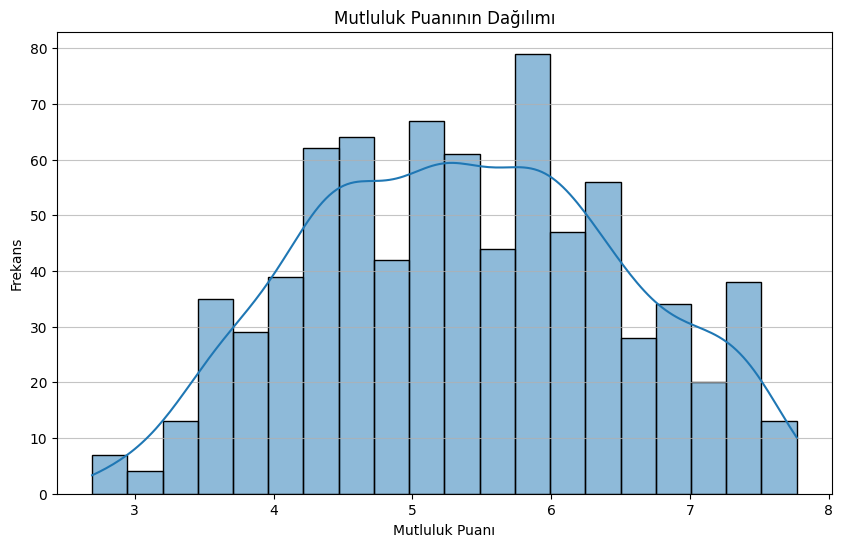

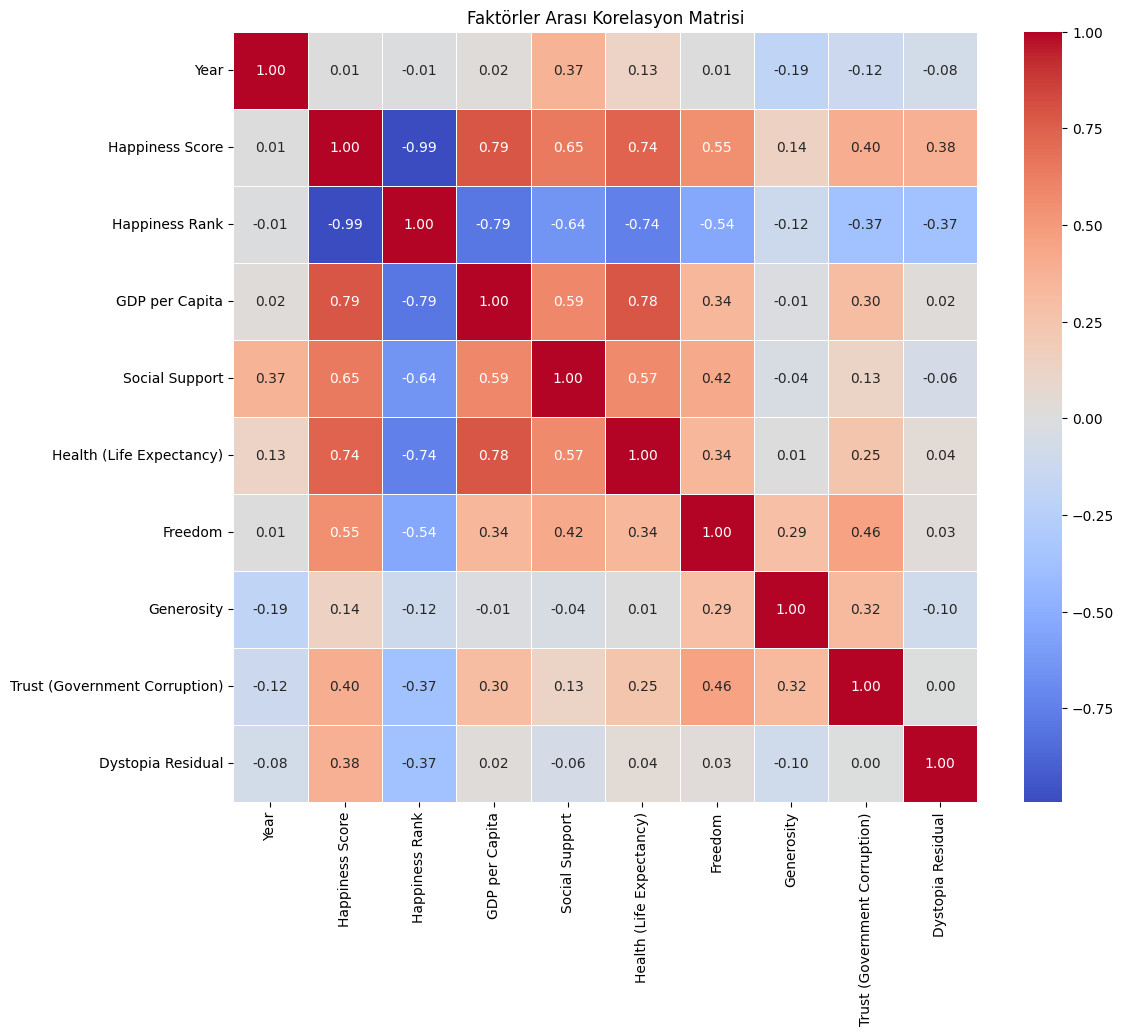


Mutluluk Puanı ile diğer faktörler arasındaki korelasyonlar:
Happiness Score                  1.000000
GDP per Capita                   0.789284
Health (Life Expectancy)         0.742456
Social Support                   0.648799
Freedom                          0.551258
Trust (Government Corruption)    0.397484
Dystopia Residual                0.382730
Generosity                       0.137578
Year                             0.007065
Happiness Rank                  -0.992066
Name: Happiness Score, dtype: float64


In [6]:
# Keşifçi Veri Analizi (EDA - Exploratory Data Analysis)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# df_cleaned DataFrame'iniz hazır olmalı.

# 1. Temel İstatistikler
print("Temizlenmiş DataFrame'deki sayısal sütunların temel istatistikleri:")
print(df_cleaned.describe())

# 2. Mutluluk Puanının Dağılımı (Histogram ve Yoğunluk Grafiği)
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Happiness Score'], kde=True, bins=20)
plt.title('Mutluluk Puanının Dağılımı')
plt.xlabel('Mutluluk Puanı')
plt.ylabel('Frekans')
plt.grid(axis='y', alpha=0.75)
plt.show()

# 3. Mutluluk Puanı ile Diğer Faktörler Arasındaki Korelasyon Matrisi
# Sadece sayısal sütunları dahil edelim
numeric_cols = df_cleaned.select_dtypes(include=[np.number]).columns
correlation_matrix = df_cleaned[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Faktörler Arası Korelasyon Matrisi')
plt.show()

print("\nMutluluk Puanı ile diğer faktörler arasındaki korelasyonlar:")
print(correlation_matrix['Happiness Score'].sort_values(ascending=False))

Temel İstatistikler Üzerine Yorumlar:

Happiness Score (Mutluluk Puanı):

Ortalama: ~5.38
Standart Sapma: ~1.13 (Dağılımın oldukça geniş olduğunu, yani ülkeler arasında büyük farklılıklar olduğunu gösteriyor.)
Min: 2.69 (En düşük mutluluk puanı)
Max: 7.77 (En yüksek mutluluk puanı)
Bu, ülkelerin mutluluk düzeylerinin oldukça geniş bir yelpazede yayıldığını gösteriyor.
GDP per Capita (Kişi Başı GSYİH):

Ortalama: ~0.92
Oldukça geniş bir aralığa sahip (min 0, max 2.096), bu da ülkelerin ekonomik gelişmişlik düzeylerinde büyük farklılıklar olduğunu gösterir.
Diğer Faktörler: Benzer şekilde, diğer faktörlerin de (Sosyal Destek, Sağlıklı Yaşam Beklentisi, Özgürlük, Cömertlik, Yolsuzluk Algısı) belirli bir aralıkta dağıldığını görüyoruz. Min değerlerinin 0 olması, bazı ülkelerde bu faktörlerin katkısının çok düşük olduğunu gösterebilir.

Korelasyon Analizi Üzerine Yorumlar:

Bu kısım, mutluluk skorunu etkileyen ana faktörleri belirlemek için çok önemli:

Happiness Score (Mutluluk Puanı) ile Diğer Faktörler Arası Korelasyonlar:

Happiness Rank: -0.992066 (Çok güçlü negatif korelasyon). Bu beklenen bir durumdur çünkü Mutluluk Sırası, mutluluk puanının tersidir; yani rank düştükçe (daha iyi sıralama), mutluluk puanı artar. Bu sütun, tahminleyici bir değişken olmaktan ziyade, Mutluluk Puanının bir türevidir.
GDP per Capita (Kişi Başı GSYİH): 0.789284 (Çok güçlü pozitif korelasyon). Bu, bir ülkenin ekonomik refahının (kişi başına GSYİH ile ölçülen) mutluluk puanıyla doğrudan ve güçlü bir şekilde ilişkili olduğunu gösterir. Zengin ülkeler genellikle daha mutludur.
Health (Life Expectancy) (Sağlıklı Yaşam Beklentisi): 0.742456 (Çok güçlü pozitif korelasyon). Uzun ve sağlıklı bir yaşam sürmenin mutluluk üzerinde çok önemli bir etkisi olduğunu gösteriyor.
Social Support (Sosyal Destek): 0.648799 (Güçlü pozitif korelasyon). Güçlü sosyal ağlara ve destek sistemlerine sahip olmanın mutluluğa önemli ölçüde katkıda bulunduğunu gösteriyor.
Freedom (Özgürlük): 0.551258 (Orta ila güçlü pozitif korelasyon). Hayat seçimlerini yapma özgürlüğünün de mutluluk üzerinde olumlu bir etkisi var.
Trust (Government Corruption) (Hükümet Yolsuzluğuna Güven): 0.397484 (Orta düzeyde pozitif korelasyon). Yolsuzluk algısının düşük olması (yani yüksek güven), mutluluk puanıyla olumlu ilişkilidir. Ancak diğer faktörlere göre korelasyonu daha düşüktür.
Dystopia Residual: 0.382730 (Orta düzeyde pozitif korelasyon). Bu, modelde diğer faktörlerle açıklanamayan ancak yine de mutluluğa katkıda bulunan kısım.
Generosity (Cömertlik): 0.137578 (Zayıf pozitif korelasyon). Cömertliğin mutlulukla pozitif bir ilişkisi olsa da, bu ilişki diğer faktörlere göre oldukça zayıftır.
Year (Yıl): 0.007065 (Neredeyse hiç korelasyon yok). Yılın doğrudan mutluluk puanı üzerinde güçlü bir etkisi olmadığını gösteriyor. Bu, yıllar arasında genel bir mutluluk artışı veya düşüşü olmadığını, daha çok diğer faktörlerin önemli olduğunu düşündürür.

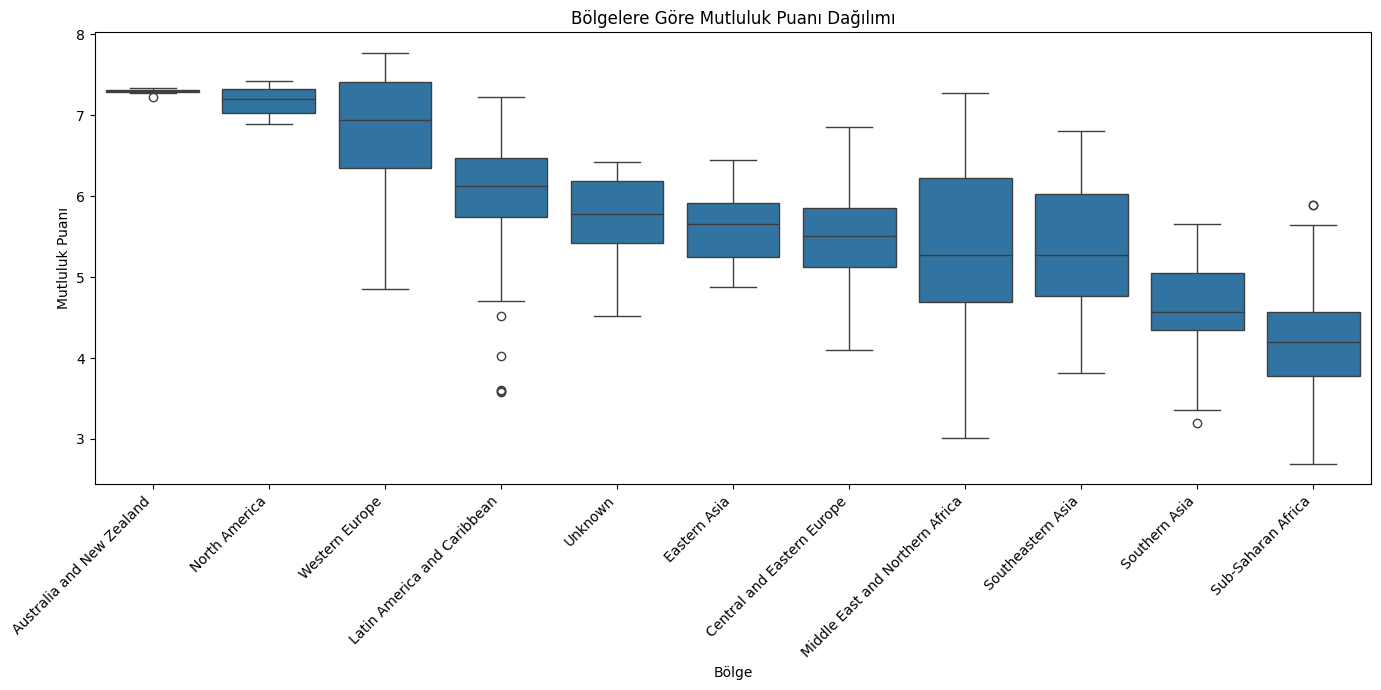


Bölgelere göre ortalama mutluluk puanları:
Region
Australia and New Zealand          7.294600
North America                      7.174700
Western Europe                     6.759311
Latin America and Caribbean        6.020725
Unknown                            5.702625
Eastern Asia                       5.630464
Central and Eastern Europe         5.428875
Middle East and Northern Africa    5.337208
Southeastern Asia                  5.335227
Southern Asia                      4.580657
Sub-Saharan Africa                 4.188482
Name: Happiness Score, dtype: float64


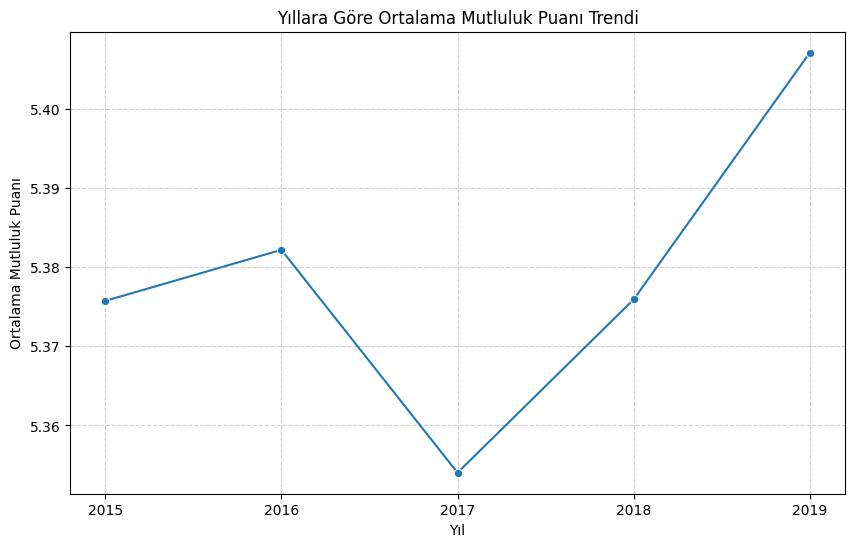


2019 yılının en mutlu 10 ülkesi:
       Country  Happiness Score
0      Finland            7.769
1      Denmark            7.600
2       Norway            7.554
3      Iceland            7.494
4  Netherlands            7.488
5  Switzerland            7.480
6       Sweden            7.343
7  New Zealand            7.307
8       Canada            7.278
9      Austria            7.246

2019 yılının en az mutlu 10 ülkesi:
                      Country  Happiness Score
155               South Sudan            2.853
154  Central African Republic            3.083
153               Afghanistan            3.203
152                  Tanzania            3.231
151                    Rwanda            3.334
150                     Yemen            3.380
149                    Malawi            3.410
148                     Syria            3.462
147                  Botswana            3.488
146                     Haiti            3.597

Tüm yıllar boyunca en mutlu 10 ülke (ortalama):
Country
Den

In [7]:
# 4. Bölgelere Göre Mutluluk Analizi
plt.figure(figsize=(14, 7))
sns.boxplot(x='Region', y='Happiness Score', data=df_cleaned, order=df_cleaned.groupby('Region')['Happiness Score'].mean().sort_values(ascending=False).index)
plt.title('Bölgelere Göre Mutluluk Puanı Dağılımı')
plt.xlabel('Bölge')
plt.ylabel('Mutluluk Puanı')
plt.xticks(rotation=45, ha='right') # Eksen etiketlerini döndür
plt.tight_layout() # Grafiğin düzenini iyileştir
plt.show()

# Bölgelere göre ortalama mutluluk puanlarını gösterelim
print("\nBölgelere göre ortalama mutluluk puanları:")
print(df_cleaned.groupby('Region')['Happiness Score'].mean().sort_values(ascending=False))

# 5. Yıllara Göre Ortalama Mutluluk Puanı Trendi
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Happiness Score', data=df_cleaned.groupby('Year')['Happiness Score'].mean().reset_index(), marker='o')
plt.title('Yıllara Göre Ortalama Mutluluk Puanı Trendi')
plt.xlabel('Yıl')
plt.ylabel('Ortalama Mutluluk Puanı')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(df_cleaned['Year'].unique()) # Sadece mevcut yılları göster
plt.show()


# 6. En mutlu ve en az mutlu ülkeleri yıllara göre listeleyelim (örnek olarak 2019 için)
print("\n2019 yılının en mutlu 10 ülkesi:")
print(df_cleaned[df_cleaned['Year'] == 2019].sort_values(by='Happiness Score', ascending=False).head(10)[['Country', 'Happiness Score']])

print("\n2019 yılının en az mutlu 10 ülkesi:")
print(df_cleaned[df_cleaned['Year'] == 2019].sort_values(by='Happiness Score', ascending=True).head(10)[['Country', 'Happiness Score']])

# Önemli not: Diğer yıllar için de benzer listeleri çıkarabiliriz.
# Eğer tüm yıllar için genel bir en mutlu/en az mutlu ülke listesi isteniyorsa,
# ülkelere göre ortalama mutluluk puanlarına bakabiliriz.

# Ülkelere göre genel ortalama mutluluk puanı (tüm yıllar boyunca)
print("\nTüm yıllar boyunca en mutlu 10 ülke (ortalama):")
print(df_cleaned.groupby('Country')['Happiness Score'].mean().sort_values(ascending=False).head(10))

print("\nTüm yıllar boyunca en az mutlu 10 ülke (ortalama):")
print(df_cleaned.groupby('Country')['Happiness Score'].mean().sort_values(ascending=True).head(10))

In [8]:
# Mutluluğa Katkıda Bulunan Altı Faktörün Her Birinde En Yüksek Sıradaki Ülkeler
# Faktörleri belirleyelim
factors = [
    'GDP per Capita',
    'Social Support',
    'Health (Life Expectancy)',
    'Freedom',
    'Generosity',Herhangi bir ülke mutlulukta önemli bir artış veya azalma yaşadı mı?

    'Trust (Government Corruption)'
]

print("\n--- Faktörlere Göre En Yüksek Sıradaki Ülkeler (Tüm Yıllar Ortalaması) ---")

for factor in factors:
    # Her faktör için ülkelere göre ortalama hesapla
    top_countries = df_cleaned.groupby('Country')[factor].mean().sort_values(ascending=False).head(5)
    print(f"\n{factor} Faktöründe En Yüksek 5 Ülke:")
    print(top_countries)


--- Faktörlere Göre En Yüksek Sıradaki Ülkeler (Tüm Yıllar Ortalaması) ---

GDP per Capita Faktöründe En Yüksek 5 Ülke:
Country
Qatar                   1.743691
United Arab Emirates    1.645227
Luxembourg              1.637675
Singapore               1.592138
Kuwait                  1.555662
Name: GDP per Capita, dtype: float64

Social Support Faktöründe En Yüksek 5 Ülke:
Country
Iceland              1.492813
Trinidad & Tobago    1.484500
Denmark              1.447688
Ireland              1.445056
New Zealand          1.439729
Name: Social Support, dtype: float64

Health (Life Expectancy) Faktöründe En Yüksek 5 Ülke:
Country
Hong Kong          1.029513
Singapore          1.014186
Japan              0.979099
Northern Cyprus    0.975500
Spain              0.950108
Name: Health (Life Expectancy), dtype: float64

Freedom Faktöründe En Yüksek 5 Ülke:
Country
Uzbekistan    0.655988
Norway        0.638049
Cambodia      0.637871
Oman          0.632740
Denmark       0.625959
Name: Freedom, dty

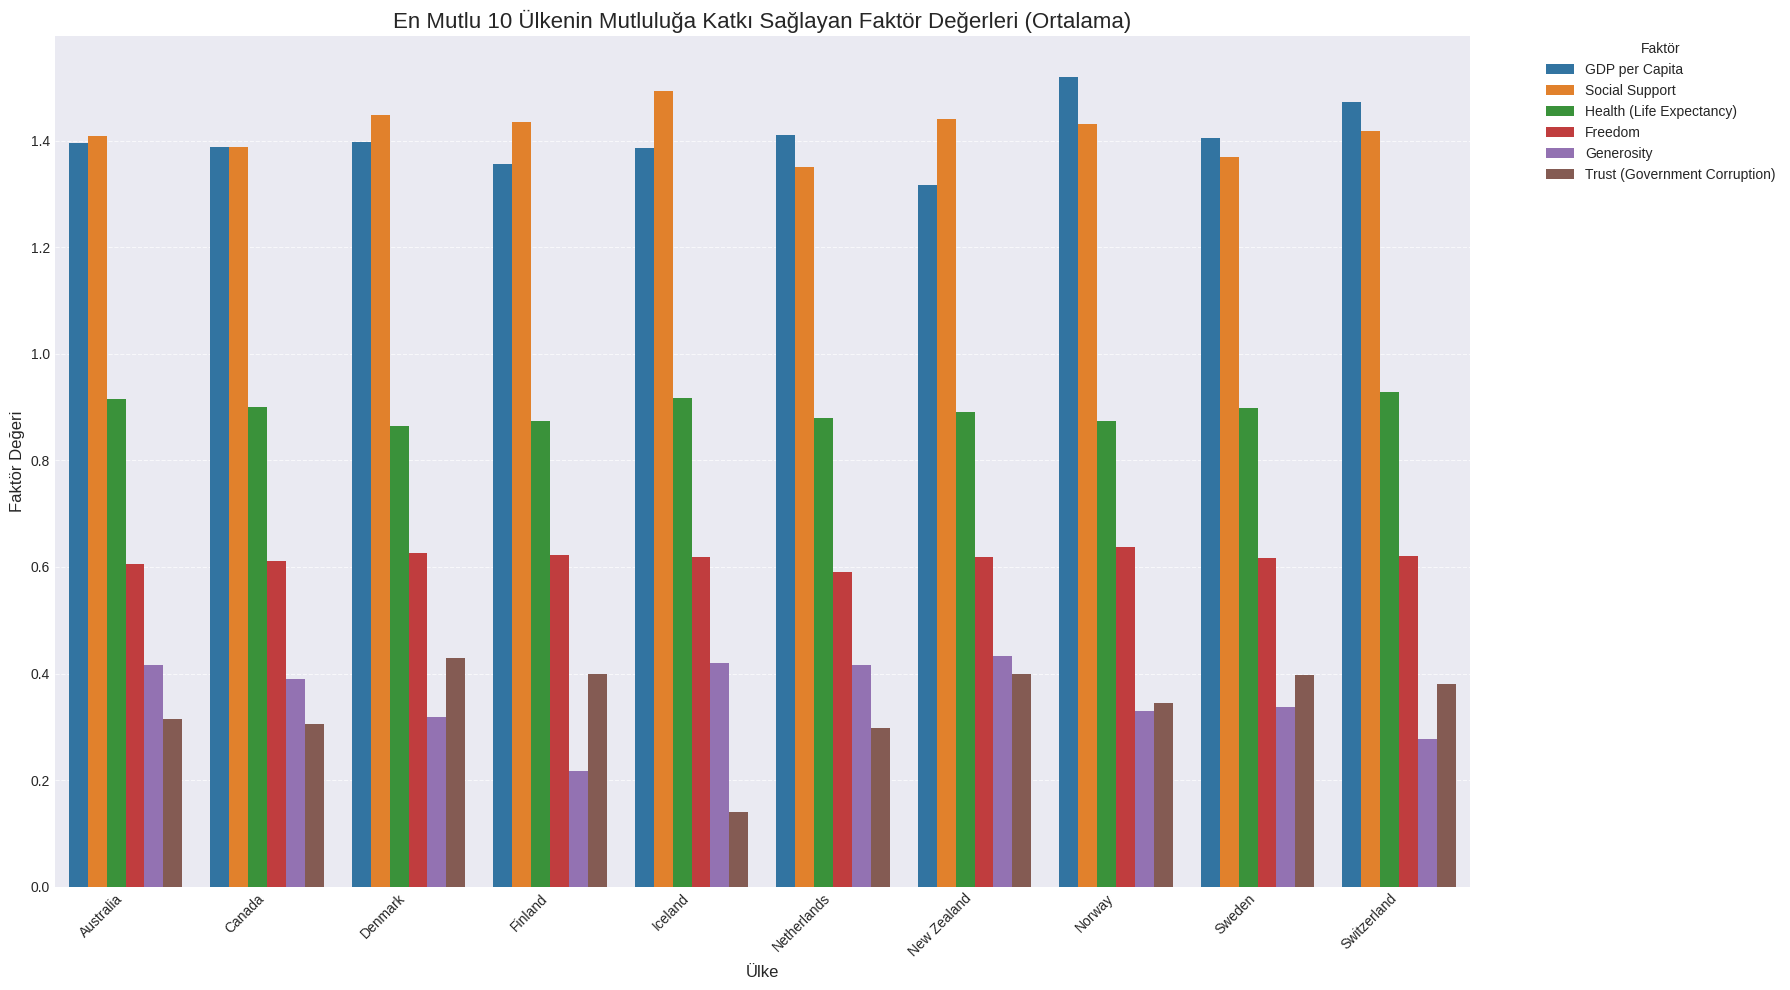

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# df_cleaned DataFrame'iniz hazır olmalı

# 1. Tüm yıllar boyunca ortalama mutluluk puanına göre en mutlu 10 ülkeyi bulalım
top_10_happiest_countries = df_cleaned.groupby('Country')['Happiness Score'].mean().sort_values(ascending=False).head(10).index

# 2. Bu 10 ülkenin tüm faktör değerlerini içeren DataFrame'i filtreleyelim
# Her ülkenin her faktördeki ortalama değerini almamız gerekiyor
df_top_10_factors = df_cleaned[df_cleaned['Country'].isin(top_10_happiest_countries)]
df_top_10_factors_mean = df_top_10_factors.groupby('Country')[['GDP per Capita', 'Social Support',
                                                               'Health (Life Expectancy)', 'Freedom',
                                                               'Generosity', 'Trust (Government Corruption)']].mean().reset_index()

# DataFrame'i görselleştirme için "uzun" formata dönüştürelim (melt işlemi)
df_melted = df_top_10_factors_mean.melt(id_vars='Country', var_name='Factor', value_name='Value')

# 3. Grup Sütun Grafiği Çizimi
plt.figure(figsize=(18, 10))
sns.barplot(x='Country', y='Value', hue='Factor', data=df_melted, palette='tab10')

plt.title('En Mutlu 10 Ülkenin Mutluluğa Katkı Sağlayan Faktör Değerleri (Ortalama)', fontsize=16)
plt.xlabel('Ülke', fontsize=12)
plt.ylabel('Faktör Değeri', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10) # Ülke isimlerini daha okunur hale getir
plt.yticks(fontsize=10)
plt.legend(title='Faktör', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.) # Açıklamayı dışarı al
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() # Grafiğin düzenini iyileştir
plt.show()

In [11]:
import pandas as pd

# df_cleaned DataFrame'iniz hazır olmalı

def compare_years(df, year1, year2, top_n=10):
    """
    İki yıl arasındaki ülke sıralamalarını ve mutluluk puanlarını karşılaştırır.
    """
    print(f"\n--- {year1} ve {year2} Yılları Arası Karşılaştırma ---")

    # İlgili yılların verilerini alalım
    df_year1 = df[df['Year'] == year1][['Country', 'Happiness Score', 'Happiness Rank']].set_index('Country')
    df_year2 = df[df['Year'] == year2][['Country', 'Happiness Score', 'Happiness Rank']].set_index('Country')

    # İki DataFrame'i birleştirelim
    # Sadece her iki yılda da bulunan ülkeleri karşılaştıracağız
    df_comparison = df_year1.join(df_year2, lsuffix=f'_{year1}', rsuffix=f'_{year2}', how='inner')

    # Mutluluk Puanı Değişimi
    df_comparison['Score_Change'] = df_comparison[f'Happiness Score_{year2}'] - df_comparison[f'Happiness Score_{year1}']
    print(f"\nMutluluk Puanı Değişimi (En Yüksek Artış):")
    print(df_comparison.sort_values(by='Score_Change', ascending=False).head(top_n)[['Score_Change', f'Happiness Score_{year1}', f'Happiness Score_{year2}']])

    print(f"\nMutluluk Puanı Değişimi (En Yüksek Azalış):")
    print(df_comparison.sort_values(by='Score_Change', ascending=True).head(top_n)[['Score_Change', f'Happiness Score_{year1}', f'Happiness Score_{year2}']])

    # Sıralama Değişimi (Daha düşük rank daha iyidir, bu yüzden artış azalış ters yorumlanır)
    # Rank_Change pozitifse sıra düştü (kötüleşti), negatifse sıra yükseldi (iyileşti)
    df_comparison['Rank_Change'] = df_comparison[f'Happiness Rank_{year2}'] - df_comparison[f'Happiness Rank_{year1}']
    print(f"\nSıralama Değişimi (En Çok Yükselen Ülkeler - Rank Değişimi Negatif):")
    print(df_comparison.sort_values(by='Rank_Change', ascending=True).head(top_n)[['Rank_Change', f'Happiness Rank_{year1}', f'Happiness Rank_{year2}']])

    print(f"\nSıralama Değişimi (En Çok Düşen Ülkeler - Rank Değişimi Pozitif):")
    print(df_comparison.sort_values(by='Rank_Change', ascending=False).head(top_n)[['Rank_Change', f'Happiness Rank_{year1}', f'Happiness Rank_{year2}']])


# 2015-2016 Karşılaştırması
compare_years(df_cleaned, 2015, 2016)

# 2016-2017 Karşılaştırması
compare_years(df_cleaned, 2016, 2017)


--- 2015 ve 2016 Yılları Arası Karşılaştırma ---

Mutluluk Puanı Değişimi (En Yüksek Artış):
                    Score_Change  Happiness Score_2015  Happiness Score_2016
Country                                                                     
Algeria                    0.750                 5.605                 6.355
Togo                       0.464                 2.839                 3.303
Latvia                     0.462                 5.098                 5.560
Romania                    0.404                 5.124                 5.528
Hungary                    0.345                 4.800                 5.145
Senegal                    0.315                 3.904                 4.219
Tunisia                    0.306                 4.739                 5.045
Lebanon                    0.290                 4.839                 5.129
Nepal                      0.279                 4.514                 4.793
Dominican Republic         0.270                 4.885     

2016'dan 2017'ye Mutluluk Puanında En Büyük Düşüşü Yaşayan Ülkeler:
           Happiness Score_2016  Happiness Score_2017  Happiness_Score_Change
Country                                                                      
Venezuela                 6.084                 5.250                  -0.834
Algeria                   6.355                 5.872                  -0.483
Haiti                     4.028                 3.603                  -0.425
Zimbabwe                  4.193                 3.875                  -0.318
Tanzania                  3.666                 3.349                  -0.317


<ipython-input-12-49ce84212c22>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_fall_countries[factor_change_col], y=top_fall_countries.index, ax=axes[i], palette='coolwarm')
<ipython-input-12-49ce84212c22>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_fall_countries[factor_change_col], y=top_fall_countries.index, ax=axes[i], palette='coolwarm')
<ipython-input-12-49ce84212c22>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_fall_countries[factor_change_col], y=top_fall_countries.index, ax=axes[i], palette='coolwarm'

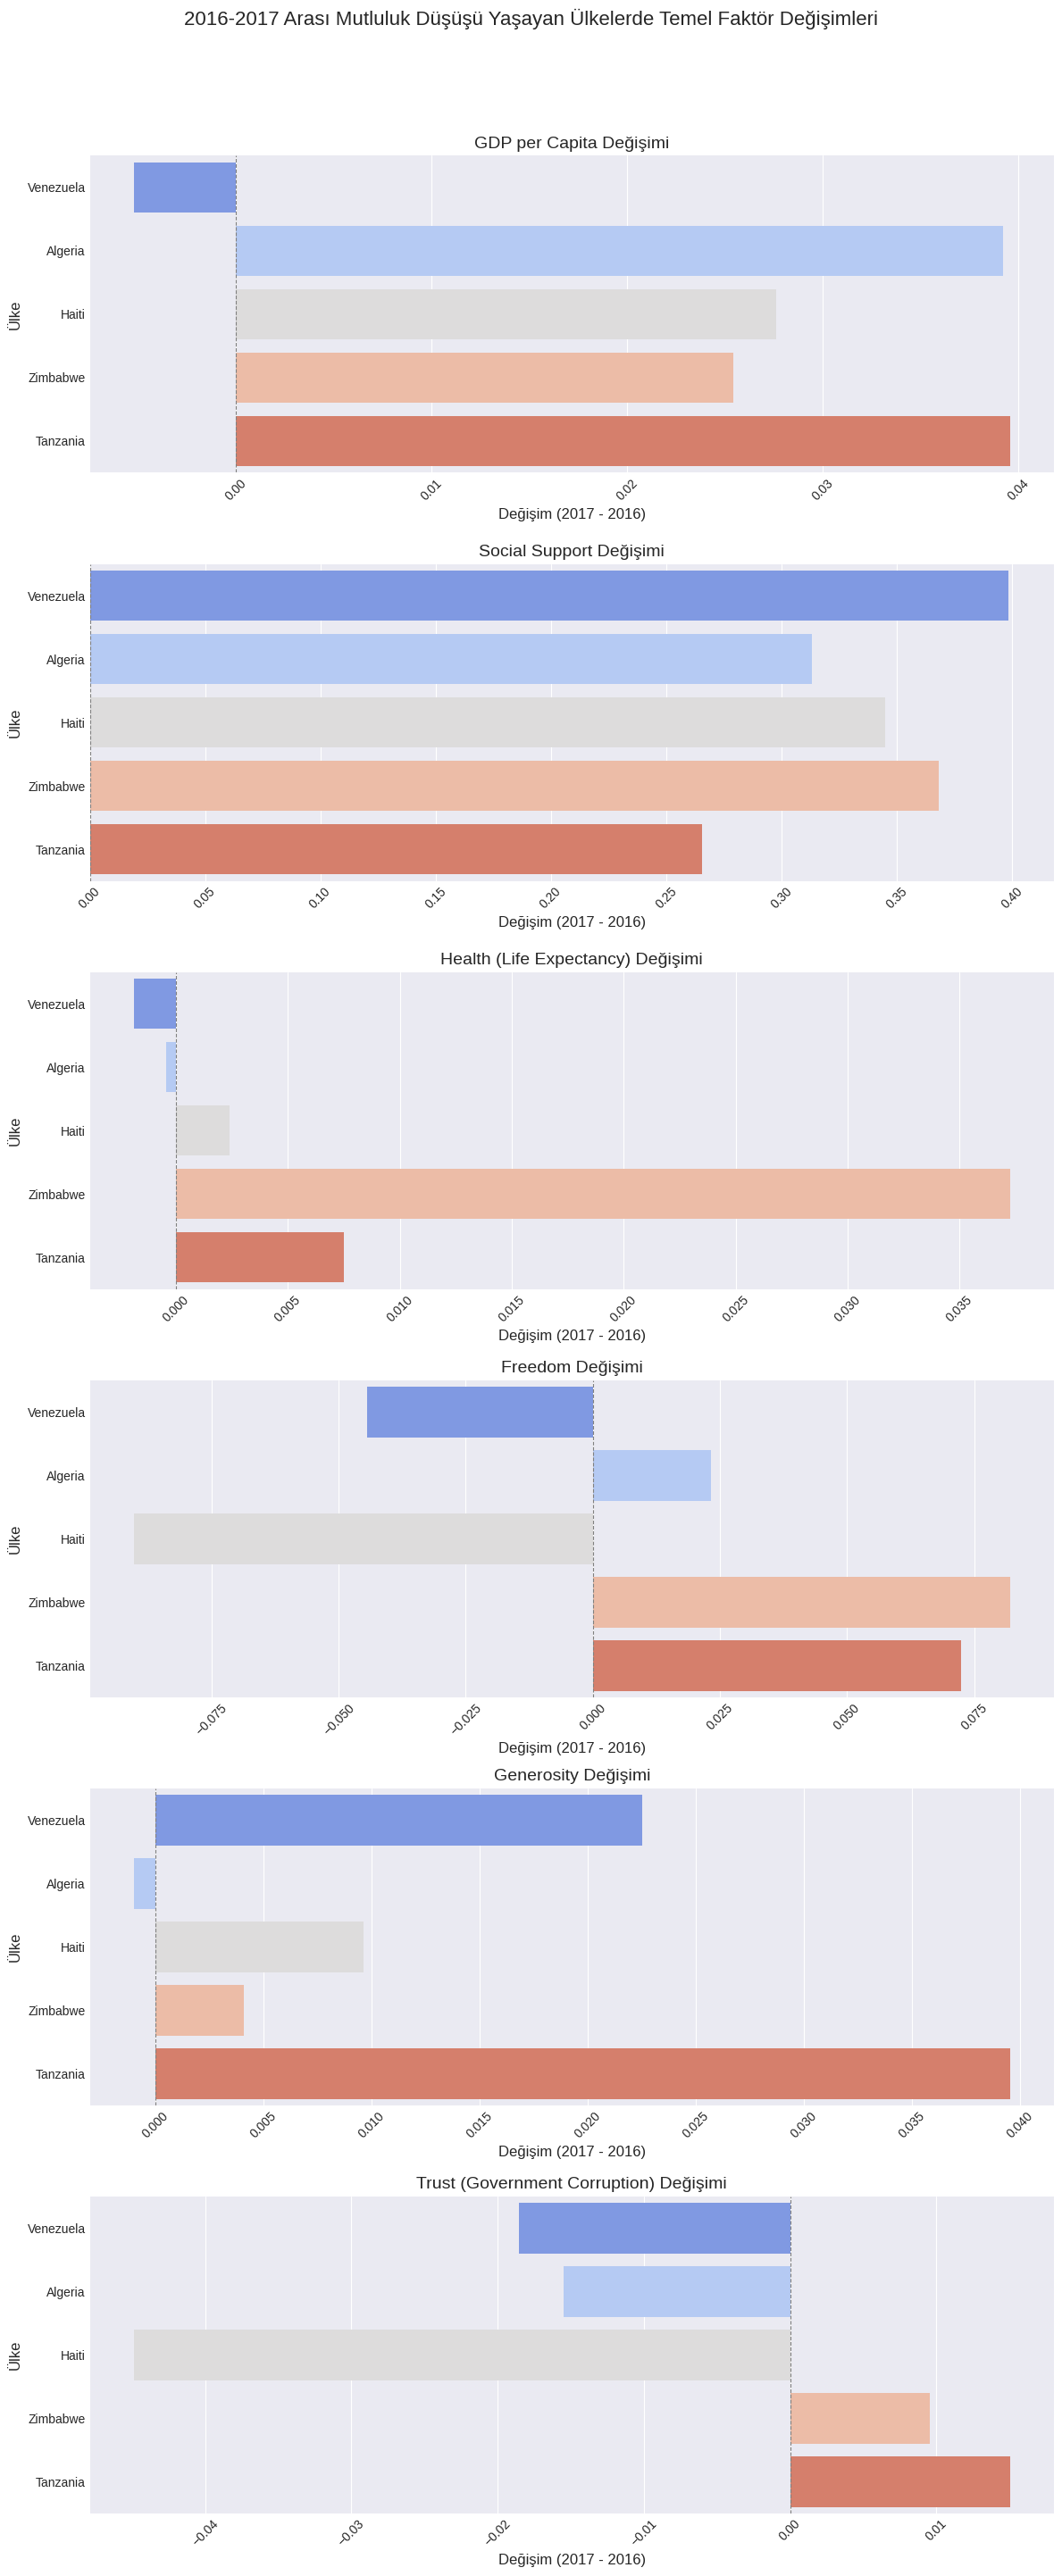


En Büyük Düşüşü Yaşayan Ülkelerde Temel Faktör Değişimleri (2017 - 2016):


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# df_cleaned DataFrame'iniz hazır olmalı

# 1. 2016 ve 2017 yıllarına ait verileri alalım
df_2016 = df_cleaned[df_cleaned['Year'] == 2016][['Country', 'Happiness Score',
                                                 'GDP per Capita', 'Social Support',
                                                 'Health (Life Expectancy)', 'Freedom',
                                                 'Generosity', 'Trust (Government Corruption)']].set_index('Country')
df_2017 = df_cleaned[df_cleaned['Year'] == 2017][['Country', 'Happiness Score',
                                                 'GDP per Capita', 'Social Support',
                                                 'Health (Life Expectancy)', 'Freedom',
                                                 'Generosity', 'Trust (Government Corruption)']].set_index('Country')

# 2. İki yılın verilerini birleştirelim ve mutluluk puanı değişimini hesaplayalım
df_diff = df_2017.join(df_2016, lsuffix='_2017', rsuffix='_2016', how='inner')
df_diff['Happiness_Score_Change'] = df_diff['Happiness Score_2017'] - df_diff['Happiness Score_2016']

# 3. Mutluluk puanında en büyük düşüşü yaşayan ilk 5 ülkeyi belirleyelim
# Sort by 'Happiness_Score_Change' in ascending order to get the biggest drops
top_fall_countries = df_diff.sort_values(by='Happiness_Score_Change', ascending=True).head(5)

print("2016'dan 2017'ye Mutluluk Puanında En Büyük Düşüşü Yaşayan Ülkeler:")
print(top_fall_countries[['Happiness Score_2016', 'Happiness Score_2017', 'Happiness_Score_Change']])

# 4. Bu ülkelerin altı temel faktördeki değişimlerini görselleştirelim
factors_to_analyze = [
    'GDP per Capita',
    'Social Support',
    'Health (Life Expectancy)',
    'Freedom',
    'Generosity',
    'Trust (Government Corruption)'
]

plt.style.use('seaborn-v0_8-darkgrid')
fig, axes = plt.subplots(len(factors_to_analyze), 1, figsize=(12, 5 * len(factors_to_analyze)))
fig.suptitle('2016-2017 Arası Mutluluk Düşüşü Yaşayan Ülkelerde Temel Faktör Değişimleri', fontsize=16, y=0.99)

for i, factor in enumerate(factors_to_analyze):
    # Her ülke için faktör değişimini hesapla
    factor_change_col = f'{factor}_Change'
    top_fall_countries[factor_change_col] = top_fall_countries[f'{factor}_2017'] - top_fall_countries[f'{factor}_2016']

    # Her faktör için yatay çubuk grafik çiz
    sns.barplot(x=top_fall_countries[factor_change_col], y=top_fall_countries.index, ax=axes[i], palette='coolwarm')
    axes[i].set_title(f'{factor} Değişimi', fontsize=14)
    axes[i].set_xlabel('Değişim (2017 - 2016)', fontsize=12)
    axes[i].set_ylabel('Ülke', fontsize=12)
    axes[i].axvline(0, color='grey', linestyle='--', linewidth=0.8) # 0 çizgisini ekle
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.96]) # Ana başlık için yer bırak
plt.show()

# Tüm faktör değişimlerini bir tablo olarak da gösterelim
print("\nEn Büyük Düşüşü Yaşayan Ülkelerde Temel Faktör Değişimleri (2017 - 2016):")
# Sadece değişim sütunlarını al

In [13]:
import pandas as pd

# df_cleaned DataFrame'iniz hazır olmalı

def find_significant_changes(df, top_n=5):
    """
    Ardışık yıllar arasında mutluluk puanında en büyük artış veya azalışı yaşayan ülkeleri bulur.
    """
    print("\n--- Yıllar Arası En Önemli Mutluluk Değişimleri ---")

    # Tüm benzersiz yılları alalım ve sıralayalım
    years = sorted(df['Year'].unique())

    # Değişimleri depolamak için boş bir DataFrame
    all_changes = pd.DataFrame()

    # Ardışık yılları karşılaştır
    for i in range(len(years) - 1):
        year1 = years[i]
        year2 = years[i+1]

        df_year1 = df[df['Year'] == year1][['Country', 'Happiness Score']].set_index('Country')
        df_year2 = df[df['Year'] == year2][['Country', 'Happiness Score']].set_index('Country')

        # İki DataFrame'i birleştir
        df_comparison = df_year1.join(df_year2, lsuffix=f'_{year1}', rsuffix=f'_{year2}', how='inner')

        # Mutluluk Puanı Değişimi
        df_comparison['Score_Change'] = df_comparison[f'Happiness Score_{year2}'] - df_comparison[f'Happiness Score_{year1}']
        df_comparison['Start_Year'] = year1
        df_comparison['End_Year'] = year2
        df_comparison['Initial_Score'] = df_comparison[f'Happiness Score_{year1}']
        df_comparison['Final_Score'] = df_comparison[f'Happiness Score_{year2}']

        all_changes = pd.concat([all_changes, df_comparison[['Score_Change', 'Start_Year', 'End_Year', 'Initial_Score', 'Final_Score']]])

    # En büyük artışları ve azalışları bulalım
    print(f"\nMutluluk Puanında En Büyük Artışı Yaşayan İlk {top_n} Ülke (Tüm Dönemler Boyunca):")
    print(all_changes.sort_values(by='Score_Change', ascending=False).head(top_n))

    print(f"\nMutluluk Puanında En Büyük Azalışı Yaşayan İlk {top_n} Ülke (Tüm Dönemler Boyunca):")
    print(all_changes.sort_values(by='Score_Change', ascending=True).head(top_n))

# Fonksiyonu çalıştıralım
find_significant_changes(df_cleaned)


--- Yıllar Arası En Önemli Mutluluk Değişimleri ---

Mutluluk Puanında En Büyük Artışı Yaşayan İlk 5 Ülke (Tüm Dönemler Boyunca):
         Score_Change  Start_Year  End_Year  Initial_Score  Final_Score
Country                                                                
Burundi         0.870        2018      2019          2.905        3.775
Algeria         0.750        2015      2016          5.605        6.355
Benin           0.742        2018      2019          4.141        4.883
Jamaica         0.579        2017      2018          5.311        5.890
Guinea          0.570        2018      2019          3.964        4.534

Mutluluk Puanında En Büyük Azalışı Yaşayan İlk 5 Ülke (Tüm Dönemler Boyunca):
           Score_Change  Start_Year  End_Year  Initial_Score  Final_Score
Country                                                                  
Malaysia         -0.983        2018      2019          6.322        5.339
Liberia          -0.949        2015      2016          4.571    

<ipython-input-15-ba4c33dd4286>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Score_Change', y='Country', data=top_increases, palette='Greens_d')


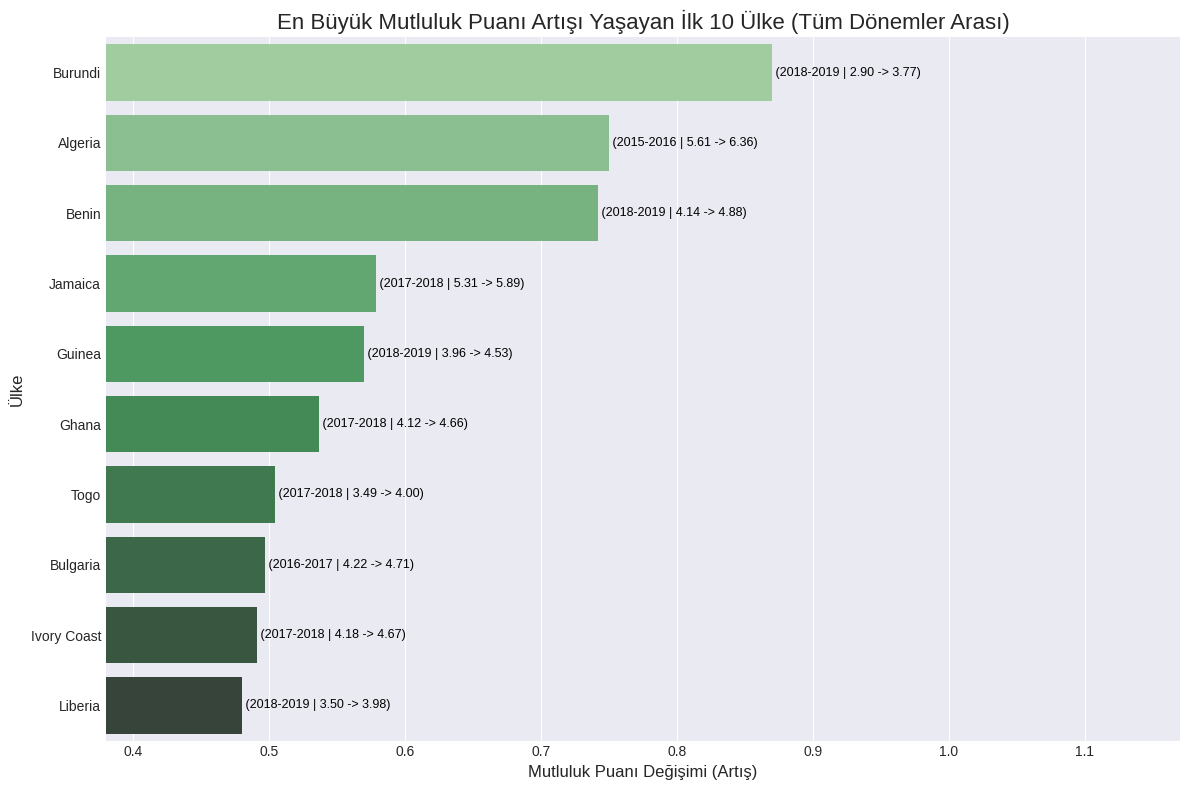

<ipython-input-15-ba4c33dd4286>:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Score_Change', y='Country', data=top_decreases, palette='Reds_d')


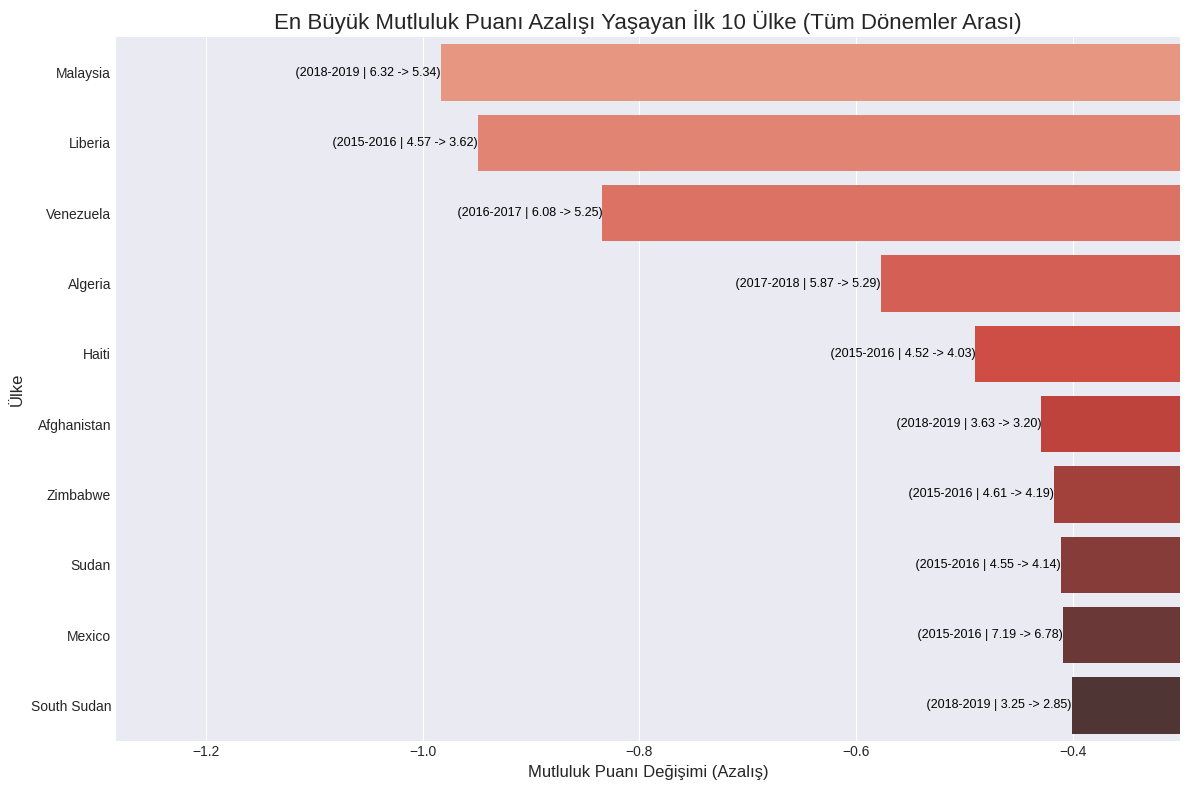

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# df_cleaned DataFrame'iniz önceki adımlardan hazır olmalı.

# find_significant_changes fonksiyonunu güncelleyelim
def find_significant_changes(df):
    years = sorted(df['Year'].unique())
    all_changes = pd.DataFrame()

    for i in range(len(years) - 1):
        year1 = years[i]
        year2 = years[i+1]

        # Ülkeleri indeks olarak değil, doğrudan bir sütun olarak alalım
        df_year1 = df[df['Year'] == year1][['Country', 'Happiness Score']]
        df_year2 = df[df['Year'] == year2][['Country', 'Happiness Score']]

        # Ülke bazında birleştirelim
        # İki DataFrame'i 'Country' sütununda birleştirelim
        df_comparison = pd.merge(df_year1, df_year2, on='Country', suffixes=(f'_{year1}', f'_{year2}'), how='inner')

        df_comparison['Score_Change'] = df_comparison[f'Happiness Score_{year2}'] - df_comparison[f'Happiness Score_{year1}']
        df_comparison['Start_Year'] = year1
        df_comparison['End_Year'] = year2
        df_comparison['Initial_Score'] = df_comparison[f'Happiness Score_{year1}']
        df_comparison['Final_Score'] = df_comparison[f'Happiness Score_{year2}']

        # Sadece ilgili sütunları seçip birleştirelim
        all_changes = pd.concat([all_changes, df_comparison[['Country', 'Score_Change', 'Start_Year', 'End_Year', 'Initial_Score', 'Final_Score']]])

    return all_changes.reset_index(drop=True) # İndeksi sıfırla ve eski indeksi sütun olarak tutma

# all_changes_df DataFrame'ini oluşturalım
all_changes_df = find_significant_changes(df_cleaned)

# --- Görselleştirme ---
top_n = 10 # En iyi ve en kötü 10 ülkeyi gösterelim

# En büyük artışları filtrele
# Her ülke için en büyük artışı bulmak için önce group_by Country yapıp idxmax() kullanacağız
# idxmax() kullanırken Country sütunu groupby anahtarı olduğu için index olarak gelecektir.
# Bu yüzden .loc[idxmax()] ile dataframe'den ilgili satırı alırken Country'yi de alacağız.
max_increases_per_country_idx = all_changes_df.groupby('Country')['Score_Change'].idxmax()
max_increases_per_country = all_changes_df.loc[max_increases_per_country_idx]
top_increases = max_increases_per_country.sort_values(by='Score_Change', ascending=False).head(top_n)

# En büyük azalışları filtrele
min_decreases_per_country_idx = all_changes_df.groupby('Country')['Score_Change'].idxmin()
min_decreases_per_country = all_changes_df.loc[min_decreases_per_country_idx]
top_decreases = min_decreases_per_country.sort_values(by='Score_Change', ascending=True).head(top_n)

plt.style.use('seaborn-v0_8-darkgrid')

# Grafik 1: En Büyük Mutluluk Puanı Artışları
plt.figure(figsize=(12, 8))
sns.barplot(x='Score_Change', y='Country', data=top_increases, palette='Greens_d')
plt.title(f'En Büyük Mutluluk Puanı Artışı Yaşayan İlk {top_n} Ülke (Tüm Dönemler Arası)', fontsize=16)
plt.xlabel('Mutluluk Puanı Değişimi (Artış)', fontsize=12)
plt.ylabel('Ülke', fontsize=12)
# Detaylı bilgiler için etiketlere yıl ve puan bilgisi ekleyelim
for index, row in top_increases.iterrows():
    plt.text(row['Score_Change'], top_increases.index.get_loc(index), # y konumu için sırasını kullan
             f" ({row['Start_Year']}-{row['End_Year']} | {row['Initial_Score']:.2f} -> {row['Final_Score']:.2f})",
             color='black', ha="left", va='center', fontsize=9)
# X ekseni sınırlarını etiketler için genişletelim
plt.xlim(top_increases['Score_Change'].min() - 0.1, top_increases['Score_Change'].max() + 0.3)
plt.tight_layout()
plt.show()

# Grafik 2: En Büyük Mutluluk Puanı Azalışları
plt.figure(figsize=(12, 8))
sns.barplot(x='Score_Change', y='Country', data=top_decreases, palette='Reds_d')
plt.title(f'En Büyük Mutluluk Puanı Azalışı Yaşayan İlk {top_n} Ülke (Tüm Dönemler Arası)', fontsize=16)
plt.xlabel('Mutluluk Puanı Değişimi (Azalış)', fontsize=12)
plt.ylabel('Ülke', fontsize=12)
# Detaylı bilgiler için etiketlere yıl ve puan bilgisi ekleyelim
for index, row in top_decreases.iterrows():
    plt.text(row['Score_Change'], top_decreases.index.get_loc(index), # y konumu için sırasını kullan
             f" ({row['Start_Year']}-{row['End_Year']} | {row['Initial_Score']:.2f} -> {row['Final_Score']:.2f})",
             color='black', ha="right" if row['Score_Change'] < 0 else "left", va='center', fontsize=9)
# X ekseni sınırlarını etiketler için genişletelim
plt.xlim(top_decreases['Score_Change'].min() - 0.3, top_decreases['Score_Change'].max() + 0.1)
plt.tight_layout()
plt.show()

Türkiye'nin Yıllara Göre Mutluluk Endeksi ve Faktör Değişimleri:
     Year  Happiness Score  GDP per Capita  Social Support  \
231  2015            5.332        1.060980        0.946320   
702  2016            5.389        1.164920        0.877170   
538  2017            5.500        1.198274        1.337753   
387  2018            5.483        1.148000        1.380000   
78   2019            5.373        1.183000        1.360000   

     Health (Life Expectancy)   Freedom  Generosity  \
231                  0.731720  0.228150    0.122530   
702                  0.647180  0.238890    0.047070   
538                  0.637606  0.300741    0.046693   
387                  0.686000  0.324000    0.106000   
78                   0.808000  0.195000    0.083000   

     Trust (Government Corruption)  
231                       0.157460  
702                       0.123480  
538                       0.099672  
387                       0.109000  
78                        0.106000  


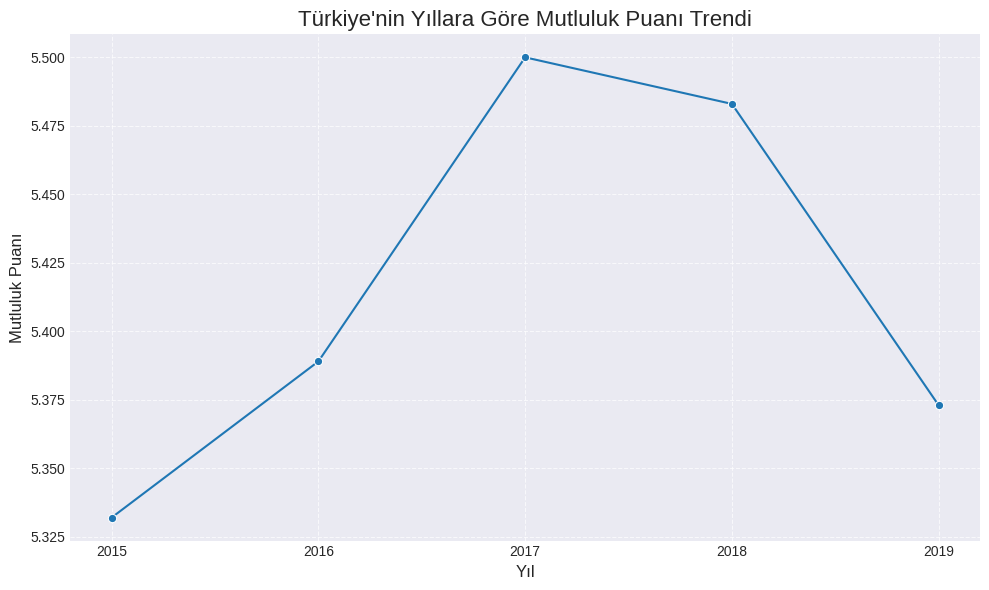

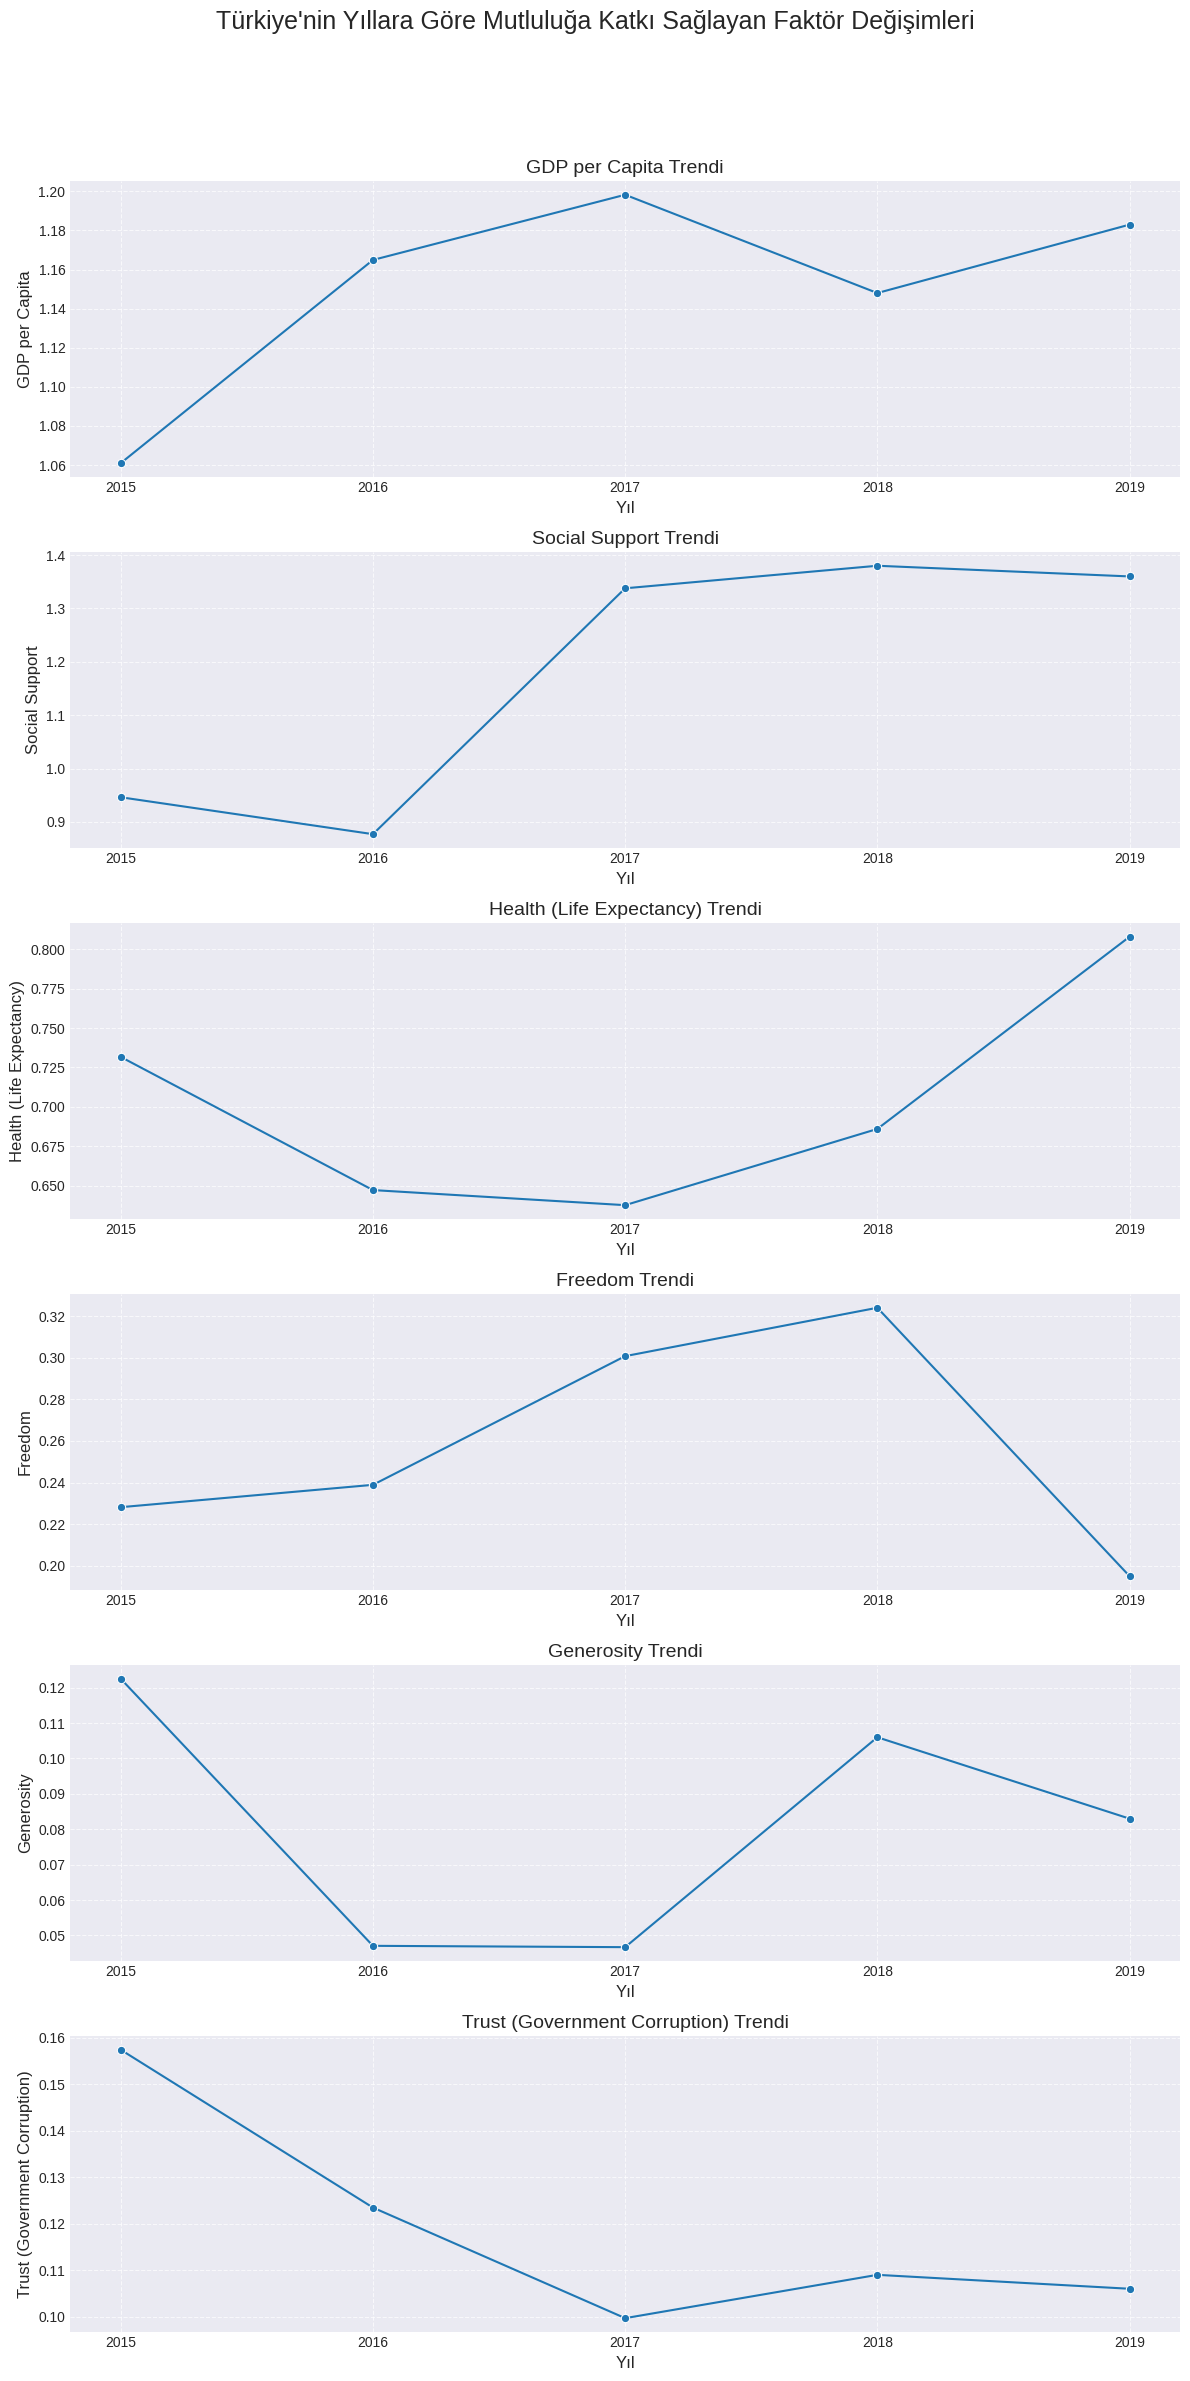

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# df_cleaned DataFrame'inizin hazır olduğundan emin olun.

# 1. Türkiye verisini filtrele
turkey_data = df_cleaned[df_cleaned['Country'] == 'Turkey'].sort_values(by='Year')

if turkey_data.empty:
    print("DataFrame'de Türkiye'ye ait veri bulunamadı. Lütfen 'Country' sütunundaki yazımı kontrol edin.")
else:
    print("Türkiye'nin Yıllara Göre Mutluluk Endeksi ve Faktör Değişimleri:")
    print(turkey_data[['Year', 'Happiness Score', 'GDP per Capita', 'Social Support',
                       'Health (Life Expectancy)', 'Freedom', 'Generosity',
                       'Trust (Government Corruption)']])

    # 2. Türkiye'nin Mutluluk Puanı Trendi
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='Year', y='Happiness Score', data=turkey_data, marker='o')
    plt.title('Türkiye\'nin Yıllara Göre Mutluluk Puanı Trendi', fontsize=16)
    plt.xlabel('Yıl', fontsize=12)
    plt.ylabel('Mutluluk Puanı', fontsize=12)
    plt.xticks(turkey_data['Year'].unique()) # Sadece mevcut yılları göster
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # 3. Türkiye'nin Faktör Değişimleri
    factors = [
        'GDP per Capita',
        'Social Support',
        'Health (Life Expectancy)',
        'Freedom',
        'Generosity',
        'Trust (Government Corruption)'
    ]

    fig, axes = plt.subplots(len(factors), 1, figsize=(12, 4 * len(factors)))
    fig.suptitle('Türkiye\'nin Yıllara Göre Mutluluğa Katkı Sağlayan Faktör Değişimleri', fontsize=18, y=1.02) # Ana başlık için y konumu

    for i, factor in enumerate(factors):
        sns.lineplot(x='Year', y=factor, data=turkey_data, marker='o', ax=axes[i])
        axes[i].set_title(f'{factor} Trendi', fontsize=14)
        axes[i].set_xlabel('Yıl', fontsize=12)
        axes[i].set_ylabel(factor, fontsize=12)
        axes[i].set_xticks(turkey_data['Year'].unique()) # Sadece mevcut yılları göster
        axes[i].grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Alt başlıklar ve ana başlık için boşluk bırak
    plt.show()